In [1]:
# Credit Fraud Detector  
# 신용 사기 감지  
  
# Note: There are still aspects of this kernel that will be subjected to changes.  
# I've noticed a recent increase of interest towards this kernel so I will focus more  
# on the steps I took and why I took them to make it clear why I took those steps.  
  
# 이 커널에는 여전히 변화될 수 있는 측면이 있습니다. 최근에 이 커널에 대한 관심이 증가하고 있어  
# 제가 취한 조치와 그 조치를 취한 이유를 명확히하기 위해 취한 이유에 더 집중할 것입니다.  
  
# Before we Begin:  
# 시작하기 앞서  
  
# If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth  
# reserach towards this subject and will look for more efficient ways so that our models are able to detect  
# more accurately both fraud and non-fraud transactions
  
# 만약 너가 이 글에 만족한다면 이 커널에 좋아요를 부탁한다.  
# 그러면 이 주제로 더 깊은 연구를 수행하는데에 동기부여가 된다.  
# 그리고 우리의 모델은 참 거짓 거래를 더 확실하게 탐지할 수 있는 더 효과있는 방법들을 찾을 것이다.  
  
  
# Introduction  
# 소개  
  
# In this kernel we will use various predictive models to see how accurate  
# they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset,  
# the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless,  
# we can still analyze some important aspects of the dataset. Let's start!  
  
# 이 커널에서 우리는 거래가 일반적인 지불 또는 사기인지 검출하는 것에서 정확한 방법을 볼 수 있는 다양한 예측 모델을 사용할 것이다.   
# 데이터 셋에서 설명 된대로 변환된 특징과 특징의 이름들은 프라이버시 때문에 보여지지 않는다.  
# 그럼에도 불구하고 우리는 데이터셋의 몇몇  중요한 양상을 분석할 수 있다.  
  
  
# Our Goals:  
# 우리의 목표  
  
# 1. Understand the little distribution of the "little" data that was provided to us.  
# 2. Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)  
# 3. Determine the Classifiers we are going to use and decide which one has a higher accuracy.  
# 4. Create a Neural Network and compare the accuracy to our best classifier.  
# 5. Understand common mistaked made with imbalanced datasets.  
  
# 1. 우리에게 주어진 작은 데이터의 작은 분포까지도 이해합니다.  
# 2. 사기와 사기가 아닌 거래의 50:50 비율의 데이터를 생성합니다.  
#    (nearmiss algorithm 사용)  
# 3. 우리는 사용할 분류기(모델)를 결정하고 정확도가 더 높은 모델을 결정합니다.  
# 4. NN을 만들고 정확도를 우리의 가장 좋은 모델과 비교합니다.  
# 5. 불균형 데이터 세트에서 흔히 범하는 실수를 이해합니다.  
  
  
# Outline:  
# 개요  
  
# I. Understanding our data  
# a) Gather Sense of our data  

# 우리의 데이터 이해하기  
# 우리의 데이터에 대한 감각 모으기  

# II. Preprocessing  
# a) Scaling and Distributing  
# b) Splitting the Data  
  
# 전처리  
# 스케일링과 분포  
# 데이터 나누기  
  
# III. Random UnderSampling and Oversampling  
# a) Distributing and Correlating  
# b) Anomaly Detection  
# c) Dimensionality Reduction and Clustering (t-SNE)  
# d) Classifiers  
# e) A Deeper Look into Logistic Regression  
# f) Oversampling with SMOTE  
  
# 랜덤 언더샘플링과 오버샘플링  
# 분포와 상관관계  
# 이상치 탐지  
# 차원축소와 클러스터링  
# 분류  
# 로지스틱 회귀분석으로 깊게 보기  
# smote를 이용한 오버샘플링  
  
# IV. Testing  
# a) Testing with Logistic Regression  
# b) Neural Networks Testing (Undersampling vs Oversampling)  
  
# 테스트  
# 로지스틱 회귀분석 테스트  
# NN 테스트  
  
  
# Correcting Previous Mistakes from Imbalanced Datasets:  
# Never test on the oversampled or undersampled dataset.  
# If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!  
# Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading),   
# instead use f1-score, precision/recall score or confusion matrix  
  
# 불균형 데이터 세트로 인한 이전 실수 수정:  
# 오버 샘플링되거나 언더 샘플링 된 데이터 세트에서 테스트하지 마세요.  
# cross-validation를 구현하려면 cross-validation 중에 training data를 oversample or undersample 해야한다. 그 전에 하면 안된다!!  
# 불균형 데이터 세트를 accuracy score로 사용하지 마, 대신에 f1-score, precision/recall score or confusion matrix를 사용해라  
  
# Gather Sense of Our Data:  
# 데이터에 대한 이해 수집  
  
# The first thing we must do is gather a basic sense of our data.  
# Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons).  
# The only thing we know, is that those columns that are unknown have been scaled already.  
  
# 첫 번째로 우리가 해야하는 것은 데이터에 대한 기초 이해 수집이다.   
# 거래 및 금액을 제외하고 우리는 다른 columns이 무엇인지 알지 못한다.(개인 정보 보호 이유로 인해)  
# 오직 우리가 알 수 있는 것은 알려지지 않은 열이 이미 변형되었다는 것이다.  
  
  
# Summary:  
# 요약  
  
# The transaction amount is relatively small. The mean of all the amounts made is approximately USD 88.  
# There are no "Null" values, so we don't have to work on ways to replace values.  
# Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.  
  
# 거래 금액은 상대적으로 작습니다. 제작된 모든 금액의 평균은 대략 88$입니다.  
# null 값은 없습니다. 그래서 우리는 대체값을 적용할 필요가 없습니다.  
# 거래의 대부분은 정상 거래(99.83%)인 반면에 사기 거래는 dataframe에서 0.17%만 발생합니다.  
  
  
# Feature Technicalities:  
# 기능 기술  
  
# PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction  technique) (Except for time and amount).  
# Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled.   
# (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)  
  
# PCA 변환 : 데이터에 대한 설명에 모든 기능이 PCA를 거쳐갔다고 합니다.(시간 및 양 제외)  
# 스케일링 : PCA 변환 기능을 구현하려면 이전에 크기를 조정해야합니다.  
# (이 경우 모든 V가 확장되었거나 최소한 데이터 세트를 개발 한 사람들이 그렇게 했다고 가정합니다.)  
  
  
# 영단어  
  
# Keep in mind that in order to implement : 구현하려면

In [61]:
# Imported Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [9]:
# Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud.  
# If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and  
# our algorithms will probably overfit since it will "assume" that most transactions are not fraud.  
# But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!  
  
# 원래의 데이터 셋이 얼마나 불균형한지 주목하십시오! 대부분의 거래는 정상입니다.  
# 이 데이터 프레임을 예측 모델 및 분석의 기반으로 사용하면 많은 오류가 발생하고 대부분의 거래가 사기가 아니라고 가정하기 때문에  
# 우리의 알고리즘은 아마도 과적합할 것입니다.  
# 그러나 우리는 모델이 가정하는 것을 원하지 않으며 모델이 사기의 징후를 나타내는 패턴을 감지하기를 원합니다.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

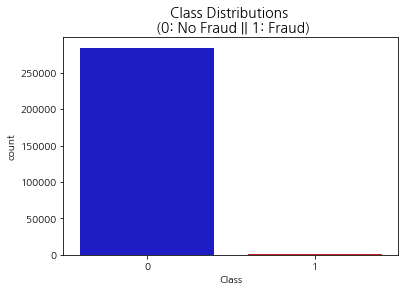

In [10]:
colors = ['#0101DF', '#DF0101']

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [11]:
# Distributions: By seeing the distributions we can have an idea how skewed are these features, 
# we can also see further distributions of the other features. 
# There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

# 분포 : 분포를 보면 특징들이 얼마나 치우친 지 알 수 있고 다른 특징의 추가 분포도 볼 수 있습니다.
# 향후 이 노트북에서 구현 될 배포판의 skew를 줄이는 데 도움이되는 기술이 있습니다.

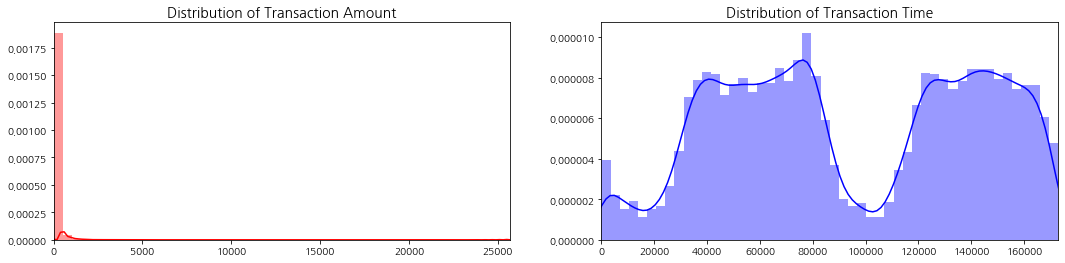

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [13]:
# Scaling and Distributing
# 스케일링과 분포

# In this phase of our kernel, we will first scale the columns comprise of Time and Amount. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

# 커널의 이 단계에서 먼저 시간과 양으로 구성된 열의 크기를 조정합니다. 시간과 양은 다른 열과 같이 조정되어야합니다.
# 반면에 같은 양의 사기 및 정상 거래의 사례를 갖기 위해 데이터프레임의 하위 샘플을 생성하여 우리의 알고리즘이 거래가 사기인지 아닌지를
# 결정하는 패턴을 더 잘 이해하도록 도와야합니다.


# What is a sub-Sample?
# 하위 샘플이란?

# In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

# 이 과정에서 하위 샘플은 사기와 정상 거래의 50:50 비율인 데이터 프레임입니다. 즉, 하위 샘플에는 동일한 양의 사기와 정상 거래가 있습니다.


# Why do we create a sub-Sample?
# 왜 하위 샘플을 생성해야하나요?

# In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

# 이 노트북의 시작 부분에서 우리는 원래 데이터 프레임이 심하게 불균형 한 것을 보았습니다! 원래 데이터 프레임을 사용하면 다음과 같은
# 문제가 발생합니다.

# 1. Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain   when a fraud occurs.

# 1. 오버피팅 : 우리의 분류 모델은 대부분 정상인 경우에 있다고 추측할 것입니다. 우리가 원하는 것은 사기가 발생했을 때 확신하는 것입니다.

# 2. Wrong Correlations: Although we don't know what the "V" features stand for, 
#    it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe 
#    we are not able to see the true correlations between the class and features.

# 2. 잘못된 상관관계 : 특징 V가 무엇을 의미하는지 모르지만, 클래스와 특징 간의 진정한 상관 관계를 볼 수 없는 
#    불균형 데이터 프레임을 가지므로  이러한 각 특징이 결과에 어떤 영향을 미치는지 이해하는 것이 유용할 것입니다.


# Summary:
# 요약

# Scaled amount and scaled time are the columns with scaled values.
# There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
# We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

# scale 된 양과 시간은 scale 된 값이 있는 열입니다.
# 데이터 셋에는 492 건의 사기 사례가 있으므로 새 하위 데이터 프레임을 생성하기 위해 492 건의 사기가 아닌 사례를 무작위로 얻을 수 있습니다.
# 492 건의 사기와 정상 거래를 연결하여 새로운 하위 샘플을 생성합니다.

In [14]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# 대부분의 데이터가 이미 확장되었으므로 확장 할 열의 크기를 조정해야합니다.(양 및 시간)

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
# RobustScaler는 이상치에 덜 민감합니다.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [15]:
# 맨 뒤에 있는 scaled amoun, time을 앞에 위치하도록 바꾸어 준다.
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
# Splitting the Data (Original DataFrame)
# 데이터 나누기

# Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. 
# Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, 
# we want to test our models on the original testing set not on the testing set created by either of these techniques. 
# The main goal is to fit the model either with the dataframes that were undersample and oversample 
# (in order for our models to detect the patterns), and test it on the original testing set.

# random undersampling 기법을 진행하기 전에 원래 데이터 프레임을 분리해야합니다. 
# 왜? 테스트 목적으로 Random UnderSampling 또는 OverSampling 기술을 구현할 때 데이터를 분할하고 있지만 
# 이러한 기술 중 하나로 생성 된 테스트 세트가 아닌 원래 테스트 세트에서 모델을 테스트하려고합니다.
# 주요 목표는 모델이 패턴을 감지하기 위해 언더 샘플링 및 오버 샘플링 된 데이터 프레임으로 모델을 맞추고 원래 테스트 세트에서 테스트하는 것입니다.

In [17]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# K-Fold 기법으로 train set과 test set을 나누어주었다.
for train_index, test_index in sss.split(X, y):
    print('Train', train_index, 'Test:', test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# 우리는 이미 x, y train 데이터를 가지고 있으므로 원본을 사용하여 이러한 변수를 구별하고 덮어 쓰지 않습니다.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
# train과 test 라벨 분포는 비슷하게 분포되어있습니다.

# train과 test set에서 label의 비율 체크
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [18]:
# Random Under-Sampling:
# 랜덤 언더 샘플링

# In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

# 프로젝트의 이 단계에서 우리는 기본적으로 데이터를 제거하는 것으로 구성된 'Random Under Sampling'을 구현하여 보다 균형잡힌 데이터 세트를
# 가지므로 모델이 과적합되는 것을 방지합니다.

# Steps:
# 1. The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount    for each label)

# 가장 먼저해야 할 일은 클래스의 불균형을 확인하는 것입니다.(클래스 열에서 'value_counts ()'를 사용하여 각 레이블의 양을 결정)

# 2. Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the    same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-   fraud transactions.

# 사기 거래로 간주되는 인스턴스 수 (Fraud = '1')를 결정한 후에는 사기 거래가 아닌 거래를 사기 거래와 같은 크기로 가져와야합니다.
# (50:50 비율을 원한다고 가정). 이는 492건의 사기 및 492건의 정상 거래에 해당합니다.

# 3. After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next      step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

# 이 기술을 구현한 후 클래스와 관련하여 50:50 비율의 데이터 프레임 하위 샘플을 얻었습니다. 그런 다음 구현할 다음 단계는 이 스크립트를
# 실행할 때마다 모델이 특정 정확도를 유지할 수 있는지 확인하기 위해 데이터를 섞는 것입니다.

# Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

# 'Random Under-Sampling'의 주요 문제는 많은 정보 손실이 발생하기 때문에 분류 모델이 원하는만큼 정확하게 수행되지 않을 위험이 있다는것입니다.
# (정상거래의 284,315건에서 492건의 정상거래를 가져온다)

In [19]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# 우리의 클래스는 매우 치우쳐 있기 때문에 클래스의 정규 분포를 갖기 위해 균형있게 만들어야합니다.

# Lets shuffle the data before creating the subsamples
# 하위 샘플을 생성하기 전에 데이터를 섞어줍시다.

# sample 함수는 df를 섞어 주는 역할을 한다. frac = 0.5 : 데이터의 50%를 랜덤 추출, frac = 2 : 2배수 추출, replace = True : 복원 추출
df = df.sample(frac=1)

# 사기와 정상거래를 492개로 동일하게 맞춰주는 언더샘플링 과정
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
33198,-0.140711,-0.558794,1.204948,-0.596925,0.745773,-1.243395,-1.292088,-0.746026,-0.624472,0.050246,...,-0.095924,0.143129,0.678628,-0.141629,0.614681,0.554716,0.127614,0.029886,0.009576,0
252774,-0.296653,0.837334,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,...,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,1
96085,-0.097813,-0.224298,-1.826975,0.279675,2.658154,-2.221086,-0.143696,0.813723,0.258249,-0.371287,...,0.776127,-0.086850,0.923325,-0.253633,-0.281823,0.354240,-0.337830,-0.138361,-0.466352,0
268375,0.251240,0.922109,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,...,-0.203270,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,1
6774,-0.293440,-0.894794,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,...,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


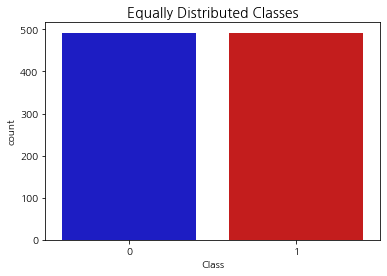

In [20]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

colors = ['#0101DF', '#DF0101']

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [21]:
# Correlation Matrices

# Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

# Correlation matrices는 데이터 이해의 핵심입니다. 특정 거래가 사기인지 여부에 큰 영향을 미치는 기능이 있는지 알고 싶습니다. 그러나
# 사기 거래와 관련하여 어떤 기능이 높은 양 또는 음의 상관 관계를 갖는지 확인하려면 올바른 데이터프레임(하위 샘플)을 사용하는 것이 중요합니다.

# Summary and Explanation:
# 요약 및 설명

# 1. Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end      result will be a fraud transaction.

# V17, V14, V12, V10은 음의 상관 관계가 있습니다. 이 값이 낮을 수록 최종 결과가 사기 거래가 될 가능성이 더 높습니다.

# 2. Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end      result will be a fraud transaction.

# V2, V4, V11, V19는 양의 상관 관계가 있습니다. 이 값이 높을 수록 최종 결과가 사기 거래가 될 가능성이 더 높습니다.

# 3. BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent          transactions.

# 우리는 사기를 치거나 정상인 거래에서 이 특징들의 분포를 더 이해하기 좋게 하기 위해 박스플롯을 사용할 것입니다.


# Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

# correlation에서 하위 샘플을 사용하는지 확인해야합니다. 그렇지 않으면 correlation이 클래스 간의 높은 불균형에 영향을 받습니다.
# 이것은 워래 데이터 프레임의 높은 수준의 불균형으로 인해 발생합니다.

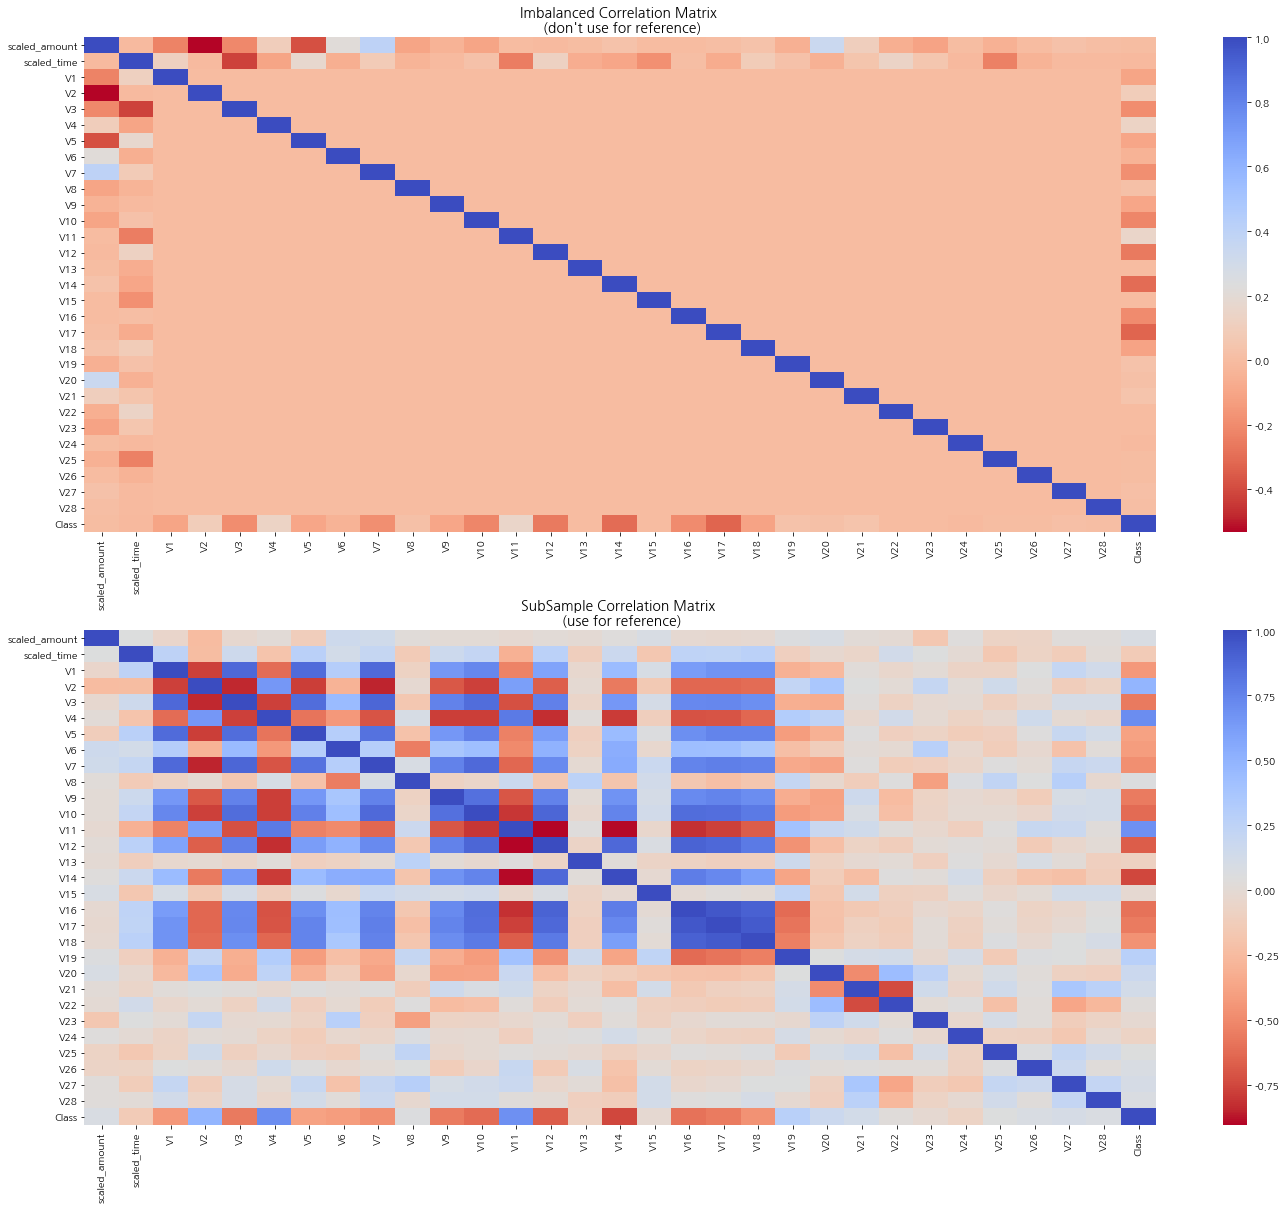

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

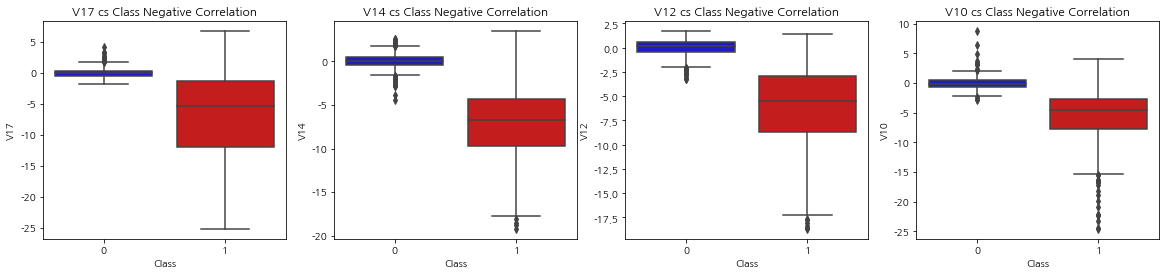

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for order, column in zip([0, 1, 2, 3], ['V17', 'V14', 'V12', 'V10']):
    sns.boxplot(x='Class', y=column, data=new_df, palette=colors, ax=axes[order])
    axes[order].set_title(column + ' vs Class Negative Correlation')

plt.show()

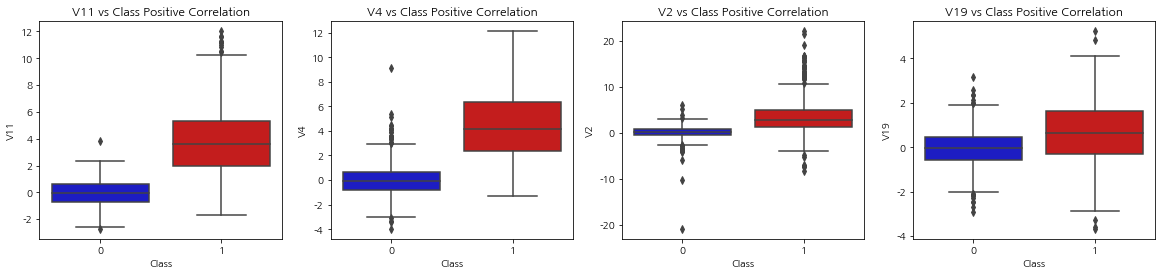

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for order, column in zip([0, 1, 2, 3], ['V11', 'V4', 'V2', 'V19']):
    sns.boxplot(x='Class', y=column, data=new_df, palette=colors, ax=axes[order])
    axes[order].set_title(column + ' vs Class Positive Correlation')

plt.show()

In [25]:
# Anomaly Detection:
# 이상치 감지

# Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. 
# This will have a positive impact on the accuracy of our models.

# 이 섹션의 주요 목표는 클래스와 높은 상관 관계가 있는 기능에서 '극단적인 이상치'를 제거하는 것입니다.
# 이것은 우리 모델의 정확성에 긍정적인 영향을 미칠 것입니다.

# Interquartile Range Method:
# 사분위 범위 방법
    
# Interquartile Range (IQR): 
# 사분위수 범위
    
# We calculate this by the difference between the 75th percentile and 25th percentile. 
# Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

# 우리는 25% ~ 75% 사이의 차이로 계산합니다.
# 우리의 목표는 일부 인스턴스가 임계값을 통과할 경우 인스턴스가 삭제되도록 25% ~ 75%를 제외한 임계값을 만드는 것입니다.

# Boxplots: 
# 박스 플롯:
    
# Besides easily seeing the 25th and 75th percentiles (both end of the squares) 
# it is also easy to see extreme outliers (points beyond the lower and higher extreme).

# 25% or 75%를 쉽게 볼 수 있을 뿐만 아니라 극단적인 이상치도 쉽게 볼 수 있습니다.


# Outlier Removal Tradeoff:
# 이상치 제거 문제
    
# We have to be careful as to how far do we want the threshold for removing outliers. 
# We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). 
# The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), 
# and the lower this threshold is the more outliers it will detect.

# 우리는 이상치를 제거하기 위한 임계값이 얼마나 필요한지 주의해야합니다.
# 숫자에 1.5를 곱하여 임계값을 결정합니다. 이 임계값이 높을수록 더 적은 이상치가 감지되고 임계값이 낮을 수록 더 많은 이상치를 감지합니다.


# The Tradeoff:

# The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. 
# Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. 
# You can play with this threshold and see how it affects the accuracy of our classification models.

# 임계값이 낮을수록 더 많은 이상치가 제거되지만, 우리는 이상치보다는 '극단적인 이상치'에 더 초점을 맞추고 싶습니다.
# 왜? 정보 손실의 위험이 있어 모델의 정확도가 떨어질 수 있기 때문입니다. 이 임계값을 가지고 놀면서 분류 모델의 정확성에 어떤영향을
# 미치는지 확인할 수 있습니다.

# Summary:
# 요약
    
# Visualize Distributions: 
# 분포 시각화
    
# We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. 
# V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

# 먼저 일부 이상치를 제거하기 위해 사용할 특징들의 분포를 시각화하는 것으로 시작합니다.
# V14는 V12, V10에 비해 가우스 분포가 있는 유일한 특징입니다.

# Determining the threshold: 
# 임계값 결정

# After we decide which number we will use to multiply with the iqr (the lower more outliers removed), 
# we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) 
# and adding q75 + threshold (upper extreme threshold).

# IQR과 곱하는 데 사용할 숫자를 결정한 후, q25를 대체하고 q75를 추가하여 상한 및 하한 임계값을 결정합니다.

# Conditional Dropping:
# 조건부 삭제
    
# Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.

# 마지막으로 두 극단에서 임계값을 초과하면 인스턴스가 제거된다는 조건부 삭제를 생성합니다.

# Boxplot Representation: 
# 박스 플롯 표현
    
# Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.
# 상자 그림을 통해 '극단적인 이상치'의 수가 상당한 양으로 감소되었음을 시각화합니다.
    
# Note: 
# After implementing outlier reduction our accuracy has been improved by over 3%! 
# Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of 
# information loss or else our model runs the risk of underfitting.

# 이상치 감소를 구현 한 후 정확도가 3% 이상 향상되었습니다! 일부 이상 값은 모델의 정확성을 왜곡 할 수 있지만 극도의 정보 손실을
# 피해야합니다. 그렇지 않으면 모델이 과소적합 될 위험이 있습니다.

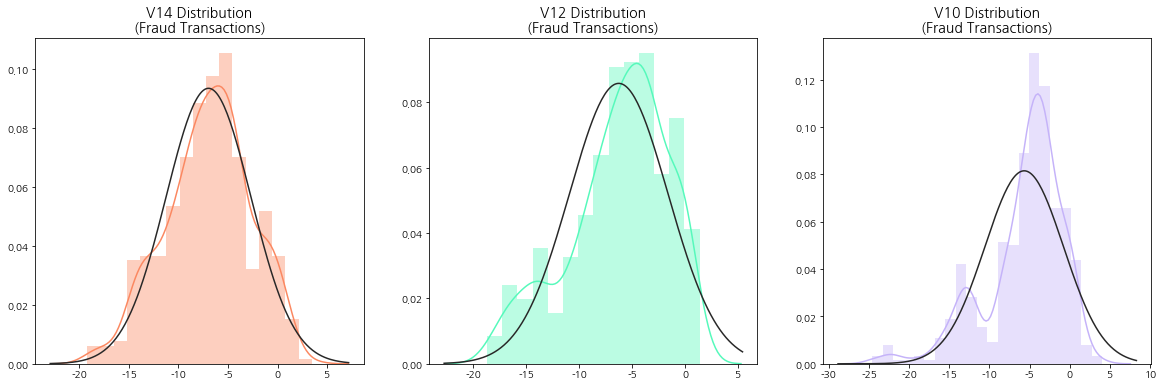

In [37]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

for order, feature, color in zip([ax1, ax2, ax3], ['V14', 'V12', 'V10'], ['#FB8861', '#56F9BB', '#C5B3F9']):
    v_fraud_dist = new_df[feature].loc[new_df['Class'] == 1].values
    sns.distplot(v_fraud_dist, ax=order, fit=norm, color=color)
    order.set_title(feature + ' Distribution\n(Fraud Transactions)', fontsize=14)

plt.show()

In [40]:
# -----> V14 Removing Outliers (Highest Negative Correlated with Labels)

for feature in ['V14', 'V12', 'V10']:
    v_fraud = new_df[feature].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    v_iqr = q75 - q25
    print('iqr: {}'.format(v_iqr))
    
    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
    print('Cut Off: {}'.format(v_cut_off))
    print('V Lower: {}'.format(v_lower))
    print('V Upper: {}'.format(v_upper))
    
    outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
    print('Feature ' + feature + ' Outliers for Fraud Cases: {}'.format(len(outliers)))
    print(feature + ' outliers:{}'.format(outliers))
    
    new_df = new_df.drop(new_df[(new_df[feature] > v_upper) | (new_df[feature] < v_lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(new_df)))
    print('----' * 44)

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V Lower: -17.807576138200663
V Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.049997689859396, -18.8220867423816, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V Lower: -17.3430371579634
V Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
V12 outliers:[-18.683714633344298, -18.553697009645802, -18.047596570821604, -18.4311310279993]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -7.466658535821848 | Qu

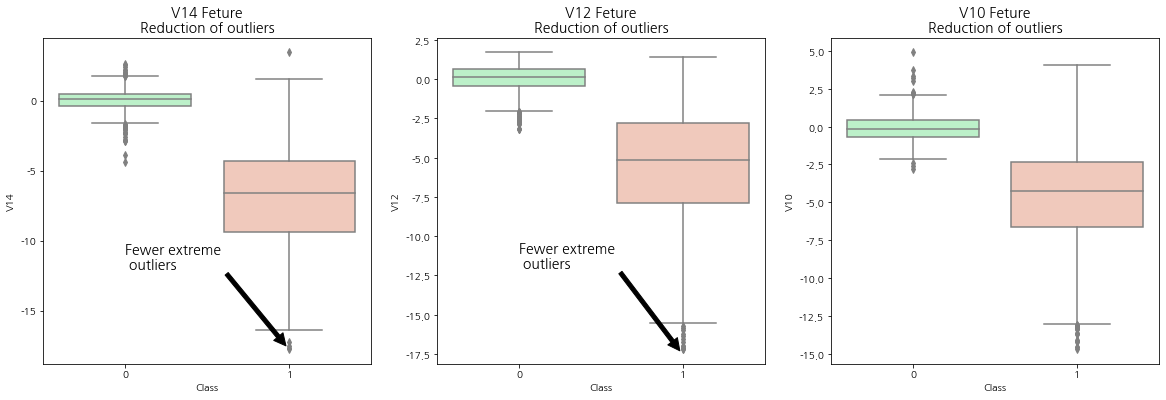

In [51]:
colors = ['#B3F9C5', '#f9c5b3']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

for order, feature, y_point in zip([ax1, ax2, ax3], ['V14', 'V12', 'V10'], [-17.5, -17.3, -16.5]):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=order, palette=colors)
    order.set_title(feature + ' Feture\nReduction of outliers', fontsize=14)
    order.annotate('Fewer extreme \n outliers', xy=(0.98, y_point), xytext=(0, -12), arrowprops=dict(facecolor='black'), fontsize=14)

In [ ]:
# Dimensionality Reduction and Clustering:
# 차원 축소와 군집
    
# Understanding t-SNE:
# t-SNE 이해하기
    
# In order to understand this algorithm you have to understand the following terms:
# 먼저 너는 문서를 따라가려면 이 알고리즘에 대해 이해해야한다.
    
# 1. Euclidean Distance
# 2. Conditional Probability
# 3. Normal and T-Distribution Plots

# 1. 유클리드 거리
# 2. 조건부 확률
# 3. 정규 분포도와 T-분포도
    
# Summary:

# 1. t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.
# 2. Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)
# 3. This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

# 1. t-SNE 알고리즘은 데이터 세트에서 사기와 정상 거래 사례를 매우 정확하게 클러스터링 할 수 있습니다.
# 2. 하위 샘플은 매우 작지만 t-SNE 알고리즘은 모든 시나리오에서 매우 정확하게 클러스터를 감지할 수 있습니다.
# 3. 이는 추가 예측 모델이 사기와 정상 사례를 구분하는데 매우 효과적입니다.

In [52]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.5 s
PCA took 0.078 s
Truncated SVD took 0.0035 s


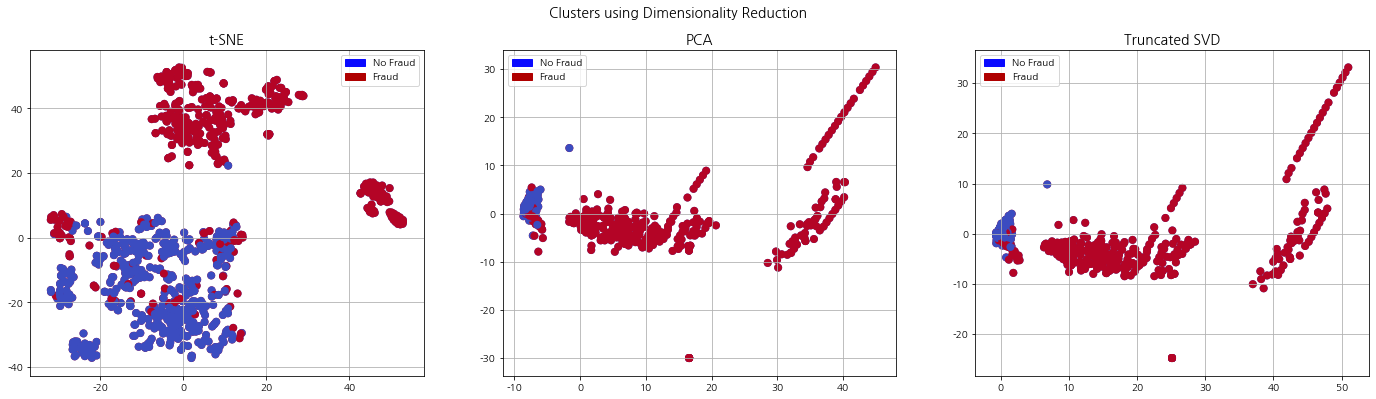

In [53]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [ ]:
# Classifiers (UnderSampling):
# 분류(언더샘플링)    
    
# In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions.
# Before we have to split our data into training and testing sets and separate the features from the labels.

# 이 섹션에서는 4가지 유형의 분류기를 학습하고 어떤 분류자가 사기 거래를 감지하는데 더 효과적인지 결정합니다.
# 데이터를 훈련 및 테스트 세트로 분할하고 라벨에서 기능을 분리하기 전에.

# Summary:
    
# 1. Logistic Regression classifier is more accurate than the other three classifiers in most cases. 
#    (We will further analyze Logistic Regression)
# 2. GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
# 3. Logistic Regression has the best Receiving Operating Characteristic score (ROC), 
#    meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

# 1. 로지스틱 회귀 분류기는 대부분의 경우 다른 세 분류기보다 더 정확합니다.
# 2. GridSearchCV는 분류기에 대해 최상의 예측 점수를 제공하는 매개 변수를 결정하는 데 사용됩니다.
# 3. 로지스틱 회귀는 가장 높은 ROC를 가지고 있습니다. 즉, 로지스틱 회귀는 사기와 정상 거래를 매우 정확하게 구분합니다.

# Learning Curves:
# 학습 곡선
    
# 1. The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
# 2. If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)
# 3. Logistic Regression Classifier shows the best score in both training and cross-validating sets.

# 1. 훈련 점수와 교차 검증 점수 사이의 차이가 클수록 모델이 과적합 될 가능성이 높습니다.
# 2. 학습 세트와 교차 검증 세트 모두에서 점수가 낮으면 모델이 과소적합이라는 표시입니다.
# 3. 로지스틱 회귀 분류기는 훈련 및 교차 검증 세트 모두에서 최고의 점수를 보여 줍니다.

In [54]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [63]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [64]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 92.0 % accuracy score


In [67]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# KNeighbors Classifier
knears_params = {'n_neighbors': list(range(2, 5, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2, 4, 1)), 'min_samples_leaf': list(range(5, 7, 1))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [68]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.13%
Knears Neighbors Cross Validation Score 92.6%
Support Vector Classifier Cross Validation Score 92.47%
DecisionTree Classifier Cross Validation Score 92.07%


In [69]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# 샘플링이 부족할 때 사용하는 기술이다. 다수의 클래스를 소수의 클래스로 맞추어 클래스의 균형을 맞추는 언더샘플링이다.

# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56962  56963  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 56961]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56962  56963  56964 ... 117678 120831 121162]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113918 113919 113920 ... 173751 174354 174646]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170881 170882 170883 ... 227851 227852 227853]
Train: [     0      1      2 ... 227851 227852 227853] Test: [222280 223022 223081 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [70]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Msi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

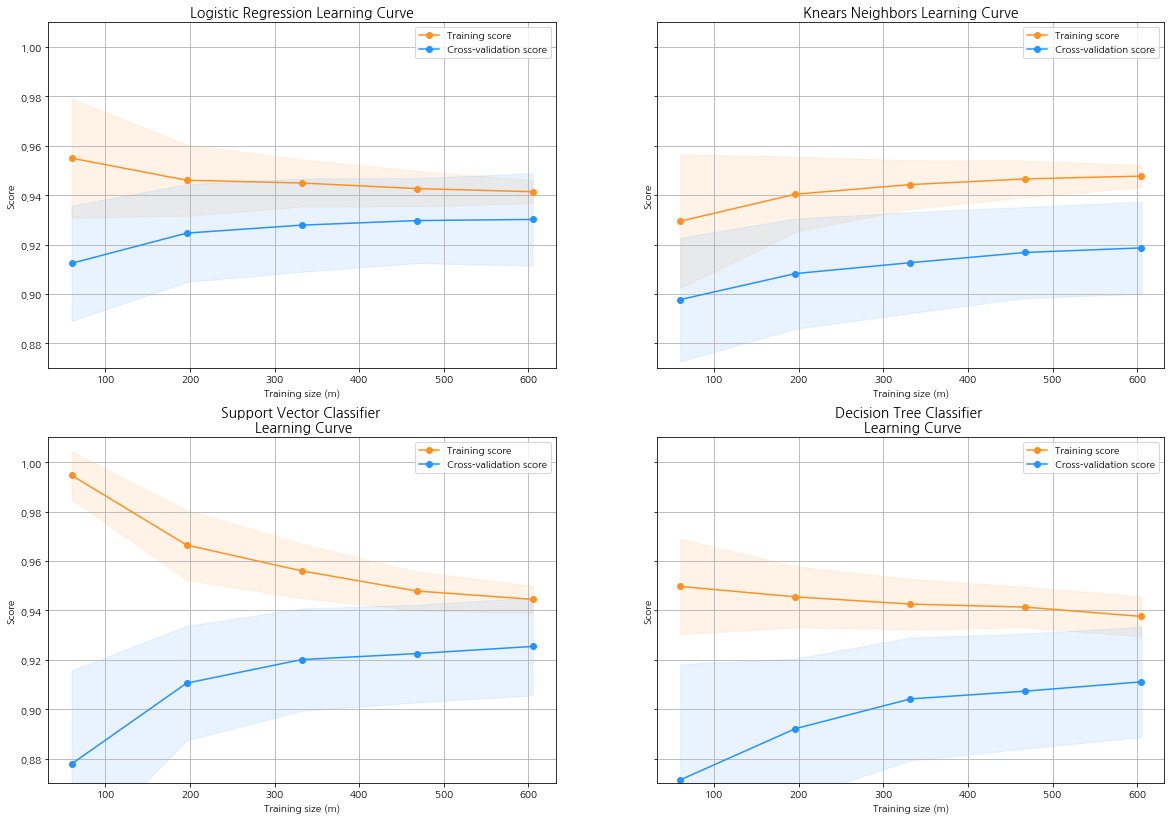

In [71]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [72]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [73]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9721824259789875
KNears Neighbors:  0.9210138210011798
Support Vector Classifier:  0.9616411034327771
Decision Tree Classifier:  0.9181836058205517


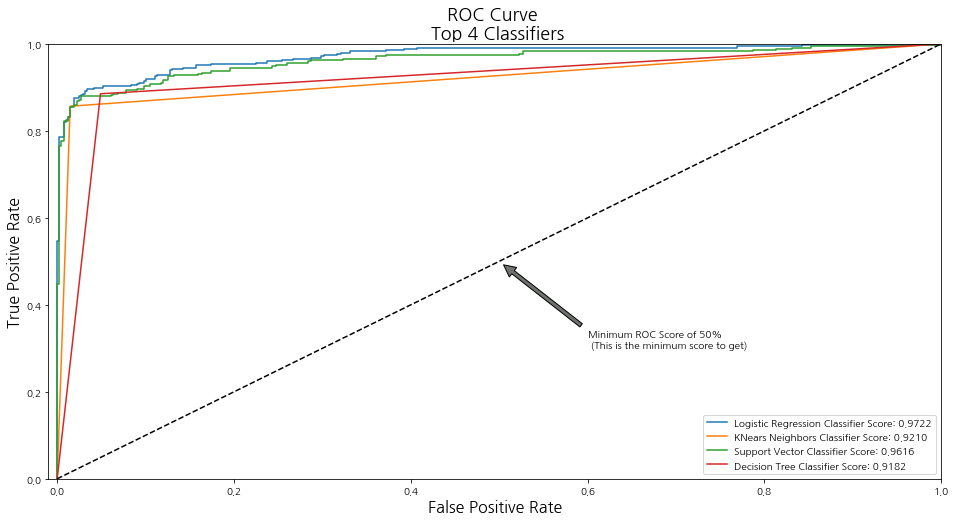

In [74]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
A Deeper Look into LogisticRegression:
로지스틱 회귀 깊게 보기
    
In this section we will ive a deeper look into the logistic regression classifier.
이 섹션에서 우리는 로지스틱 회귀 분류기에 대해 자세히 살펴보겠습니다.

Terms:
    
True Positives: Correctly Classified Fraud Transactions
False Positives: Incorrectly Classified Fraud Transactions
True Negative: Correctly Classified Non-Fraud Transactions
False Negative: Incorrectly Classified Non-Fraud Transactions
Precision: True Positives/(True Positives + False Positives)
Recall: True Positives/(True Positives + False Negatives)
    
Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
이름에서 알 수 있듯이 정밀도는 사기 거래를 감지하는 모델이 얼마나 정확한지를 말하며 리콜은 모델이 감지 할 수 있는 사기 사례의 양입니다.

Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. 
정밀도/재현율 트레이드 오프 : 모델이 더 정확할 수록 더 적은 사례를 감지합니다.
    
Example: 
Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. 
Then let's say there are 5 more cases that our model considers 90% to be a fraud case, 
if we lower the precision there are more cases that our model will be able to detect.

우리 모델의 정밀도가 95%라고 가정하고 모델이 95% 이상 정확하고 사기 사례인 사기 사례는 5개 뿐이라고 가정해보겠습니다.
그런 다음 모델이 90%를 사기 사례로 간주하는 사례가 5개 더 있다고 가정해 봅시다. 정밀도를 낮추면 모델이 감지할 수 있는 사례가 더 많아집니다.


Summary:
Precision starts to descend between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score.

그럼에도 불구하고 정밀도는 0.9에서 0.92 사이로 내려가기 시작하지만 정밀도 점수는 여전히 꽤 높으며 여전히 감소하는 recall이 있습니다.

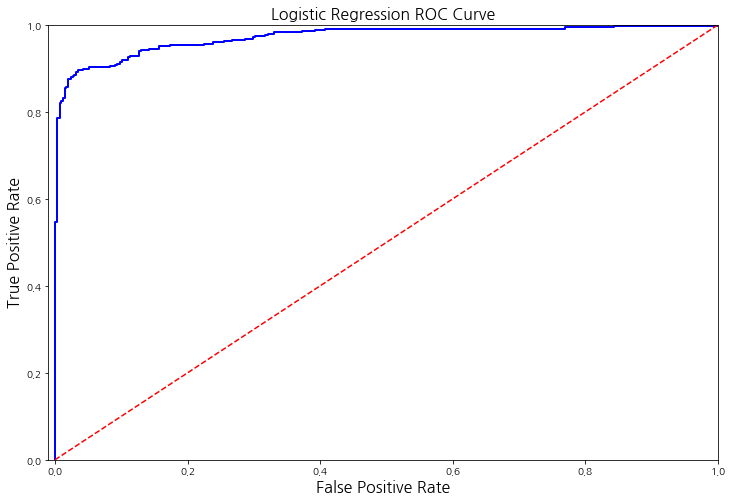

In [75]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [76]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [77]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.90
Precision Score: 0.75
F1 Score: 0.82
Accuracy Score: 0.82
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.76
Precision Score: 0.00
Recall Score: 0.20
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [78]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [79]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.06


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.06')

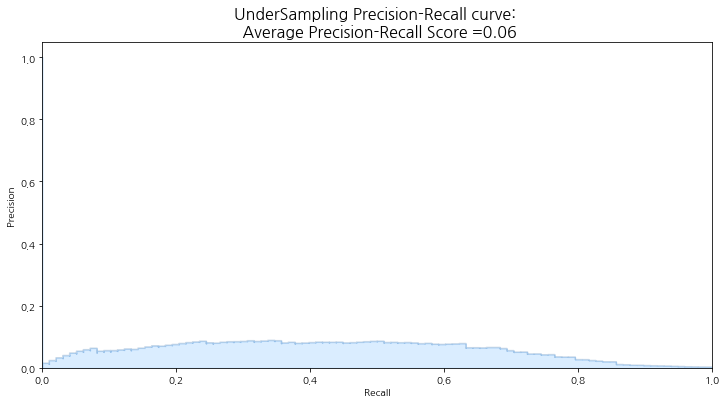

In [80]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [ ]:
# SMOTE Technique (Over-Sampling):
# SMOTE 기술(오버 샘플링)
    
# SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, 
# SMOTE creates new synthetic points in order to have an equal balance of the classes. 
# This is another alternative for solving the "class imbalance problems".


# SMOTE는 Synthetic Minority Over-sampling Technique의 약자입니다. 
# Random UnderSampling과 달리 SMOTE는 클래스의 균형을 동일하게 유지하기 위해 새로운 합성 포인트를 생성합니다. 
# 이것은 "계급 불균형 문제"를 해결하기위한 또 다른 대안입니다.

# Understanding SMOTE:

# Solving the Class Imbalance: 
# SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
# SMOTE는 소수 계급과 다수 계급 간의 동등한 균형에 도달하기 위해 소수 계급에서 합성 점수를 생성합니다.
    
# Location of the synthetic points: 
# SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
# SMOTE는 소수 계급의 가장 가까운 이웃 사이의 거리를 선택하고이 거리 사이에서 합성 점을 만듭니다.
    
# Final Effect: 
# More information is retained since we didn't have to delete any rows unlike in random undersampling.
# 무작위 언더 샘플링과 달리 행을 삭제할 필요가 없기 때문에 더 많은 정보가 유지됩니다.
    
# Accuracy || Time Tradeoff: 
# Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.
# SMOTE가 무작위 언더 샘플링보다 더 정확할 가능성이 있지만 이전에 언급 한대로 행이 제거되지 않았으므로 학습하는 데 더 많은 시간이 걸립니다.

# Cross Validation Overfitting Mistake:
# Overfitting during Cross Validation:
# In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. 
# It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. In the following section you will see amazing precision and recall scores but in reality our data is overfitting!

# The Wrong Way:

# As mentioned previously, if we get the minority class ("Fraud) in our case, 
# and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process.
# Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. 
# The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below:

                                                       
# 앞서 언급했듯이 우리의 경우 소수 클래스 ( "Fraud)를 얻고 교차 검증 전에 합성 포인트를 생성하면 교차 검증 프로세스의"검증 세트 "에 
# 특정 영향을 미칩니다. 교차 검증이 작동하는 방식을 기억하십시오. 데이터를 5 개의 배치로 분할한다고 가정하면 데이터 세트의 4/5는 학습 
# 세트가되고 1/5은 검증 세트가됩니다. 테스트 세트는 건 드리면 안됩니다. 따라서 우리는 다음을 생성해야합니다. 합성 데이터 포인트는 다음과 
# 같이 이전이 아닌 교차 검증 "중"입니다.
   
                                     
# The Right Way:

# As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. 
# Synthetic data are created only for the training set without affecting the validation set.

# 위에서 볼 수 있듯이 SMOTE는 교차 검증 프로세스의 "이전"이 아니라 교차 검증 "중"에 발생합니다. 
# 합성 데이터는 검증 세트에 영향을주지 않고 훈련 세트에 대해서만 생성됩니다.

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9698394481274164
precision: 0.06291584141116405
recall: 0.9111976630963973
f1: 0.11661528860553694
---------------------------------------------------------------------------------------------------------------------------------------


In [82]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [83]:
y_score = best_est.decision_function(original_Xtest)

In [84]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.70')

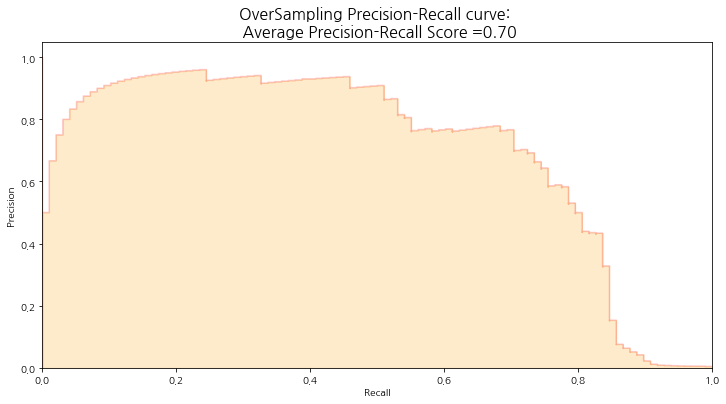

In [85]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [86]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [87]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :4.574514627456665 sec
